In [1]:
import re
from concurrent.futures import ThreadPoolExecutor
from glob import glob

import pandas as pd
from tqdm import tqdm

In [5]:
def get_df(glob_pattern):
    files = glob(glob_pattern, recursive=True)
    print(f'Loading {len(files)} files for {glob_pattern}')
    for i, fpath in enumerate(files):
        print(f'Loading {i+1}/{len(files)}: {fpath}')
    dfs = []
    for file in files:
        # print(f"    loading {file}")
        _df = pd.read_json(file, lines=True)
        # regex get run_{XX}
        _df['run_id'] = int(re.search(r'run_(.*)/', file).group(1))
        # instance_id
        dfs.append(_df)
    df = pd.concat(dfs)
    df['resolved'] = df['test_result'].apply(
        lambda x: x.get('report', {}).get('resolved', 0)
    )
    if 'report' in df.columns:
        df['resolved'] |= df['report'].apply(
            lambda x: x.get('resolved', False) if isinstance(x, dict) else False
        )
    return df


# edit_result_df = get_df('/home/xingyaow/OpenHands-edit-dev/evaluation/evaluation_outputs/outputs/swe-bench-lite/CodeActAgent/claude-3-5-sonnet-20240620_maxiter_30_N_v2.0-no-hint-v2.0-main-setting-run_*/**.swebench_eval.jsonl')
# edit_result_df = get_df('/home/xingyaow/OpenHands-edit-dev/evaluation/evaluation_outputs/outputs/swe-bench-lite/CodeActAgent/claude-3-5-sonnet-20240620_maxiter_30_N_v2.0-no-hint-v2.1-main-setting-run_*/**.swebench_eval.jsonl')

# edit_result_df = get_df('/home/xingyaow/OpenHands-edit-dev/evaluation/evaluation_outputs/outputs/swe-bench-lite/CodeActAgent/claude-3-5-sonnet-20240620_maxiter_30_N_v2.0-no-hint-v2.2-main-setting-run_*/**.swebench_eval.jsonl')
# baseline_result_df = get_df('/home/xingyaow/OpenHands-main-baseline/evaluation/evaluation_outputs/outputs/swe-bench-lite/CodeActAgent/claude-3-5-sonnet-20240620_maxiter_30_N_v1.9-no-hint-main-run_*/**.swebench_eval.jsonl')
# edit_result_df = get_df('/home/xingyaow/OpenHands-edit-dev/evaluation/evaluation_outputs/outputs/swe-bench-lite/CodeActAgent/claude-3-5-sonnet-20240620_maxiter_30_N_v2.0-no-hint-v2.2-main-setting-run_1/**.swebench_eval.jsonl')
# edit_result_df = get_df('/home/xingyaow/OpenHands-edit-dev/evaluation/evaluation_outputs/outputs/swe-bench-lite/CodeActAgent/claude-3-5-sonnet-20240620_maxiter_30_N_v2.0-no-hint-v2.3-main-setting-run_1/**.swebench_eval.jsonl')

# edit_result_df = get_df('/home/xingyaow/OpenHands-edit-dev/evaluation/evaluation_outputs/outputs/swe-bench-lite/CodeActAgent/claude-3-5-sonnet-20240620_maxiter_30_N_v2.0-no-hint-v2.4-main-setting-sonnet-editor-run_1/**.swebench_eval.jsonl')
edit_result_df_static_bs = get_df(
    '/home/xingyaow/OpenHands-edit-dev/evaluation/evaluation_outputs/outputs/princeton-nlp__SWE-bench_Lite-test/CodeActAgent/claude-3-5-sonnet-20240620_maxiter_100_N_v2.0-no-hint-v2.6.4-sonnet-editor-static-workspace-in-bsprompt-run_*/**.swebench_eval.jsonl'
)
edit_result_df = get_df(
    '/home/xingyaow/OpenHands-edit-dev/evaluation/evaluation_outputs/outputs/princeton-nlp__SWE-bench_Lite-test/CodeActAgent/claude-3-5-sonnet-20240620_maxiter_100_N_v2.0-no-hint-v2.6.4-sonnet-editor-run_*/**.swebench_eval.jsonl'
)
baseline_result_df = get_df(
    '/home/xingyaow/OpenHands-main-baseline/evaluation/evaluation_outputs/outputs/swe-bench-lite/CodeActAgent/claude-3-5-sonnet-20240620_maxiter_100_N_v1.9-no-hint-baseline-for-edit-run_*/**.swebench_eval.jsonl'
)

# baseline_result_df = get_df('/home/xingyaow/OpenHands-main-baseline/evaluation/evaluation_outputs/outputs/swe-bench-lite/CodeActAgent/claude-3-5-sonnet-20240620_maxiter_30_N_v1.9-no-hint-main-run_*/**.swebench_eval.jsonl')

# edit_result_df_topp05 = get_df('/home/xingyaow/OpenHands-edit-dev/evaluation/evaluation_outputs/outputs/swe-bench-lite/CodeActAgent/claude-3-5-sonnet-20240620_maxiter_30_N_v2.0-no-hint-v2.2-main-setting-topp0.5-run_*/**.swebench_eval.jsonl')
# baseline_result_df_topp05 = get_df('/home/xingyaow/OpenHands-main-baseline/evaluation/evaluation_outputs/outputs/swe-bench-lite/CodeActAgent/claude-3-5-sonnet-20240620_maxiter_30_N_v1.9-no-hint-main-topp0.5-run_*/**.swebench_eval.jsonl')


# edit_result_df = get_df('/home/xingyaow/OpenHands-edit-dev/evaluation/evaluation_outputs/outputs/swe-bench-lite/CodeActAgent/claude-3-5-sonnet-20240620_maxiter_30_N_v2.0-no-hint-v2.2-main-setting-run_*/output.jsonl')
# baseline_result_df = get_df('/home/xingyaow/OpenHands-main-baseline/evaluation/evaluation_outputs/outputs/swe-bench-lite/CodeActAgent/claude-3-5-sonnet-20240620_maxiter_30_N_v1.9-no-hint-main-run_*/output.jsonl')

# edit_result_df = get_df('/home/xingyaow/OpenHands-edit-dev/evaluation/evaluation_outputs/outputs/swe-bench-lite/CodeActAgent/deepseek-chat_maxiter_30_N_v2.0-no-hint-v2.2-main-setting-run_*/output.jsonl')
# baseline_result_df = get_df('/home/xingyaow/OpenHands-main-baseline/evaluation/evaluation_outputs/outputs/swe-bench-lite/CodeActAgent/deepseek-chat_maxiter_30_N_v1.9-no-hint-run_*/output.jsonl')

Loading 2 files for /home/xingyaow/OpenHands-edit-dev/evaluation/evaluation_outputs/outputs/princeton-nlp__SWE-bench_Lite-test/CodeActAgent/claude-3-5-sonnet-20240620_maxiter_100_N_v2.0-no-hint-v2.6.4-sonnet-editor-static-workspace-in-bsprompt-run_*/**.swebench_eval.jsonl
Loading 1/2: /home/xingyaow/OpenHands-edit-dev/evaluation/evaluation_outputs/outputs/princeton-nlp__SWE-bench_Lite-test/CodeActAgent/claude-3-5-sonnet-20240620_maxiter_100_N_v2.0-no-hint-v2.6.4-sonnet-editor-static-workspace-in-bsprompt-run_2/output.swebench_eval.jsonl
Loading 2/2: /home/xingyaow/OpenHands-edit-dev/evaluation/evaluation_outputs/outputs/princeton-nlp__SWE-bench_Lite-test/CodeActAgent/claude-3-5-sonnet-20240620_maxiter_100_N_v2.0-no-hint-v2.6.4-sonnet-editor-static-workspace-in-bsprompt-run_1/output.swebench_eval.jsonl
Loading 2 files for /home/xingyaow/OpenHands-edit-dev/evaluation/evaluation_outputs/outputs/princeton-nlp__SWE-bench_Lite-test/CodeActAgent/claude-3-5-sonnet-20240620_maxiter_100_N_v2.0-n

In [6]:
results = {
    'edit_static_bs': edit_result_df_static_bs,
    'edit': edit_result_df,
    # 'edit_topp05': edit_result_df_topp05,
    # 'baseline_static_bs': baseline_result_df_static_bs,
    'baseline': baseline_result_df,
    # 'baseline_topp05': baseline_result_df_topp05
}

In [7]:
combined_df = []
for name, df in results.items():
    print(f'{name} run_ids: {sorted(df["run_id"].unique())}')
    _df = (
        df.groupby('run_id')
        .agg({'resolved': 'mean', 'instance_id': 'count'})
        .rename(columns={'resolved': 'resolved', 'instance_id': 'count'})
    )
    # make two level columns
    _df.columns = pd.MultiIndex.from_tuples([(name, col) for col in _df.columns])
    combined_df.append(_df)

combined_df = pd.concat(combined_df, axis=1).sort_index(axis=1)
combined_df.style.format(
    {col: '{:.2%}' if 'resolved' in col else '{:.0f}' for col in combined_df.columns}
).background_gradient(cmap='coolwarm', subset=combined_df.columns)

edit_static_bs run_ids: [1, 2]
edit run_ids: [1, 2]
baseline run_ids: [1]


In [8]:
import scipy.stats as stats

# Extract resolved rates for each configuration
resolved_rates = {
    name: df.groupby('run_id')['resolved'].mean().values for name, df in results.items()
}

# Perform t-tests
configurations = list(resolved_rates.keys())
n = len(configurations)

print('T-test results:')
for i in range(n):
    for j in range(i + 1, n):
        config1 = configurations[i]
        config2 = configurations[j]
        t_stat, p_value = stats.ttest_ind(
            resolved_rates[config1], resolved_rates[config2]
        )
        print(f'{config1} vs {config2}:')
        print(f'  t-statistic: {t_stat:.4f}')
        print(f'  p-value: {p_value:.4f}')
        print(
            f"  {'Statistically significant' if p_value < 0.05 else 'Not statistically significant'}"
        )
        print()

T-test results:
edit_static_bs vs edit:
  t-statistic: 0.3500
  p-value: 0.7598
  Not statistically significant

edit_static_bs vs baseline:
  t-statistic: -0.6205
  p-value: 0.6465
  Not statistically significant

edit vs baseline:
  t-statistic: -1.0215
  p-value: 0.4932
  Not statistically significant



In [9]:
def get_union_resolved_ids(df):
    _resolved_series = df.groupby('instance_id').agg({'resolved': 'sum'})['resolved']
    _resolved_series = _resolved_series[_resolved_series > 0]
    return sorted(_resolved_series.index.unique())


def compare_dfs(df1, df2):
    df1_resolved_ids = get_union_resolved_ids(df1)
    df2_resolved_ids = get_union_resolved_ids(df2)
    print(f'df1 resolved: {len(df1_resolved_ids)}')
    print(f'df2 resolved: {len(df2_resolved_ids)}')
    # diff
    print(f'diff: {len(set(df1_resolved_ids) - set(df2_resolved_ids))}')

    _df1_not_df2 = []
    for _id in df1_resolved_ids:
        if _id not in df2_resolved_ids:
            _df1_not_df2.append(_id)
    _df2_not_df1 = []
    for _id in df2_resolved_ids:
        if _id not in df1_resolved_ids:
            _df2_not_df1.append(_id)

    print('***df1 resolved but df2 not***')
    for _id in _df1_not_df2:
        print(f'- {_id}')
    print('***df2 resolved but df1 not***')
    for _id in _df2_not_df1:
        print(f'- {_id}')


compare_dfs(baseline_result_df, edit_result_df)

df1 resolved: 67
df2 resolved: 85
diff: 18
***df1 resolved but df2 not***
- django__django-11049
- django__django-11815
- django__django-12983
- django__django-13028
- django__django-13158
- django__django-13401
- django__django-13590
- django__django-13757
- django__django-13933
- django__django-14238
- django__django-15814
- matplotlib__matplotlib-23314
- pylint-dev__pylint-7993
- scikit-learn__scikit-learn-14092
- scikit-learn__scikit-learn-25570
- sphinx-doc__sphinx-8713
- sympy__sympy-20590
- sympy__sympy-24066
***df2 resolved but df1 not***
- django__django-11583
- django__django-11999
- django__django-12284
- django__django-12308
- django__django-12747
- django__django-13660
- django__django-14016
- django__django-14382
- django__django-15202
- django__django-16041
- django__django-16595
- matplotlib__matplotlib-23964
- matplotlib__matplotlib-24970
- psf__requests-1963
- psf__requests-2317
- psf__requests-863
- pydata__xarray-5131
- pytest-dev__pytest-5692
- scikit-learn__scikit

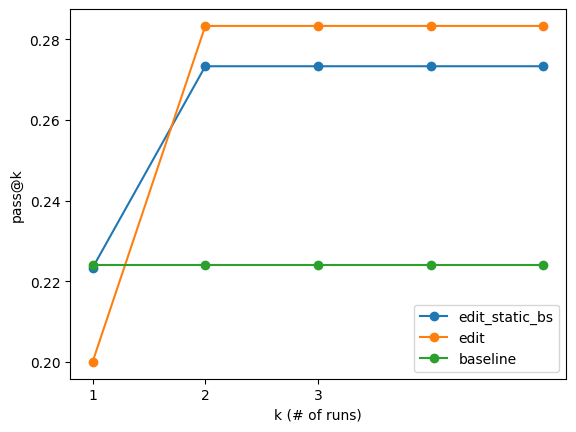

In [10]:
import matplotlib.pyplot as plt


def resolve_rate_by_k(df, max_k):
    ret = []
    for k in range(1, max_k + 1):
        ret.append(
            (
                df.query(f'run_id <= {k}')
                .groupby('instance_id')
                .agg({'resolved': 'sum'})
                > 0
            )['resolved'].sum()
            / len(df['instance_id'].unique())
        )
    return ret


K = 5


for name, df in results.items():
    resolve_rates_by_k = resolve_rate_by_k(df, K)
    plt.plot(
        [i + 1 for i, _ in enumerate(resolve_rates_by_k)],
        resolve_rates_by_k,
        label=name,
        marker='o',
    )

plt.xlabel('k (# of runs)')
plt.xticks(range(1, 4))
plt.ylabel('pass@k')
plt.legend()
plt.show()

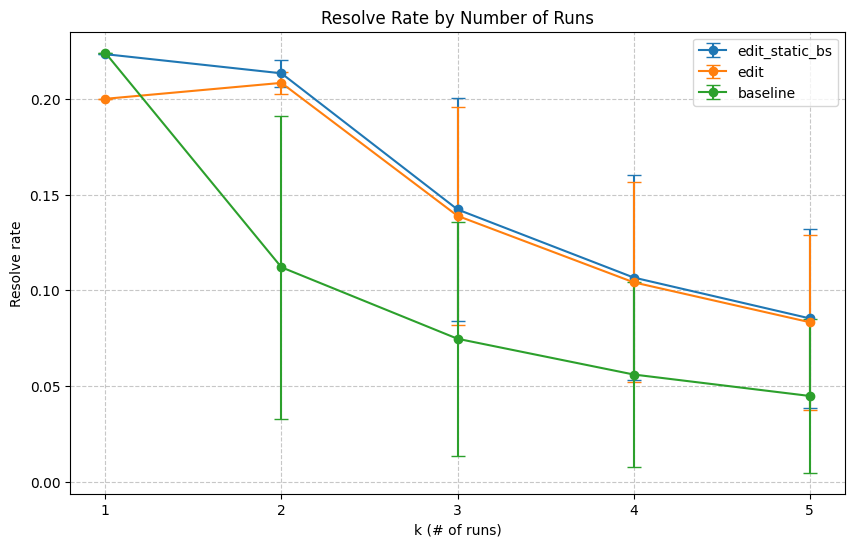

In [11]:
import matplotlib.pyplot as plt
import numpy as np


def resolve_rate_by_k(df, max_k):
    ret = []
    for k in range(1, max_k + 1):
        rates = []
        for run_id in range(1, k + 1):
            rate = (
                df[df['run_id'] == run_id]
                .groupby('instance_id')
                .agg({'resolved': 'sum'})
                > 0
            )['resolved'].sum() / len(df['instance_id'].unique())
            rates.append(rate)
        ret.append(
            (np.mean(rates), np.std(rates) / np.sqrt(len(rates)))
        )  # mean and standard error
    return ret


K = 5

plt.figure(figsize=(10, 6))  # Increase figure size for better visibility

for name, df in results.items():
    resolve_rates_by_k = resolve_rate_by_k(df, K)
    means, errors = zip(*resolve_rates_by_k)
    x = [i + 1 for i in range(len(means))]
    plt.errorbar(x, means, yerr=errors, label=name, marker='o', capsize=5)

plt.xlabel('k (# of runs)')
plt.xticks(range(1, K + 1))
plt.ylabel('Resolve rate')
plt.title('Resolve Rate by Number of Runs')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

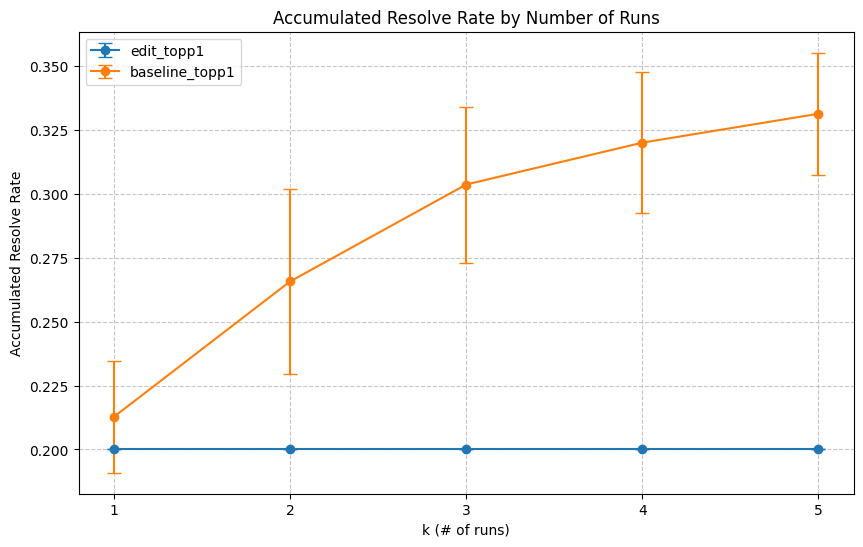

In [25]:
import matplotlib.pyplot as plt


def accumulated_resolve_rate_by_k(df, max_k):
    ret = []
    for k in range(1, max_k + 1):
        rates = []
        for _ in range(100):  # Bootstrap 100 times
            sampled_runs = np.random.choice(df['run_id'].unique(), k)
            rate = (
                df[df['run_id'].isin(sampled_runs)]
                .groupby('instance_id')
                .agg({'resolved': 'sum'})
                > 0
            )['resolved'].sum() / len(df['instance_id'].unique())
            rates.append(rate)
        ret.append((np.mean(rates), np.std(rates)))
    return ret


K = 5

plt.figure(figsize=(10, 6))

for name, df in results.items():
    resolve_rates_by_k = accumulated_resolve_rate_by_k(df, K)
    means, errors = zip(*resolve_rates_by_k)
    x = range(1, K + 1)
    plt.errorbar(x, means, yerr=errors, label=name, marker='o', capsize=5)

plt.xlabel('k (# of runs)')
plt.xticks(range(1, K + 1))
plt.ylabel('Accumulated Resolve Rate')
plt.title('Accumulated Resolve Rate by Number of Runs')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()

In [26]:
import requests

# ALLHANDS_API_KEY="ah-dfc34e0d-842a-43a9-9b72-7f29b799ac9e"
ALLHANDS_API_KEY = 'ah-e51e94fe-e0d2-45a0-ba70-36a974770a52'

response = requests.get(
    'https://runtime.eval.all-hands.dev/list?show_all=true',
    headers={'X-API-Key': ALLHANDS_API_KEY},
)

runtimes = response.json()

paused_runtimes = [
    d for d in runtimes['runtimes'] if d['status'] not in {'running', 'stopped'}
]
print(f'Paused runtimes: {len(paused_runtimes)}')

Paused runtimes: 0


In [27]:
# post
#   curl --silent --location --request POST "${BASE_URL}/stop" \
#     --header "X-API-Key: ${ALLHANDS_API_KEY}" \
#     --header "Content-Type: application/json" \
#     --data-raw "{\"runtime_id\": \"${runtime_id}\"}"


def stop_runtime(runtime):
    requests.post(
        'https://runtime.eval.all-hands.dev/stop',
        headers={'X-API-Key': ALLHANDS_API_KEY, 'Content-Type': 'application/json'},
        json={'runtime_id': runtime['runtime_id']},
    )


with ThreadPoolExecutor(max_workers=16) as executor:
    list(tqdm(executor.map(stop_runtime, paused_runtimes), total=len(paused_runtimes)))

0it [00:00, ?it/s]


In [ ]:
df = pd.read_json(
    '/home/xingyaow/OpenHands-edit-dev/evaluation/evaluation_outputs/outputs/swe-bench-lite/CodeActAgent/claude-3-5-sonnet-20240620_maxiter_30_N_v2.0-no-hint-v2.3-main-setting-run_1/output.swebench_eval.jsonl',
    lines=True,
    orient='records',
)

In [ ]:
df.drop_duplicates(subset=['instance_id']).to_json(
    '/home/xingyaow/OpenHands-edit-dev/evaluation/evaluation_outputs/outputs/swe-bench-lite/CodeActAgent/claude-3-5-sonnet-20240620_maxiter_30_N_v2.0-no-hint-v2.3-main-setting-run_1/output.swebench_eval.jsonl',
    orient='records',
    lines=True,
)